In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.getOrCreate()

In [ ]:
#1 Load data from CSV to spark
spark.read.csv("MsCustomer.csv", header=True).createOrReplaceTempView("customer")
spark.read.csv("MsDriver.csv", header=True).createOrReplaceTempView("driver")
spark.read.csv("MsFood.csv", header=True).createOrReplaceTempView("food")
spark.read.csv("MsRestaurant.csv", header=True).createOrReplaceTempView("resto")
spark.read.csv("TransactionDetail.csv", header=True).createOrReplaceTempView("detail")
spark.read.csv("TransactionHeader.csv", header=True).createOrReplaceTempView("header")

,order,drivername
0,4,Arni Blanckley
1,5,Dierdre Hyrons
2,3,Rufus Oxtaby


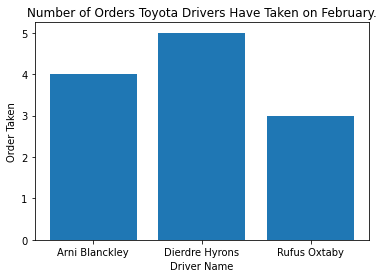

In [ ]:
#a.	Show how many orders JrebFood drivers who drived using Toyota have 
# taken in February using barplot.
data=spark.sql("""
  select count(h.transactionid) as order, drivername
  from driver d
    join header h on h.driverid = d.driverid
  where month(transactiondate) = '2' and d.drivervehicle like 'Toyota'
  group by d.driverid, drivername
  order by drivername asc
""").toPandas()

# display(data)

plt.bar(data["drivername"], data["order"])
plt.title("Number of Orders Toyota Drivers Have Taken on February.")
plt.xlabel("Driver Name")
plt.ylabel("Order Taken")
plt.show()


,monthly,revenue
0,1,23519000.0
1,2,23752300.0
2,3,25190200.0
3,4,21875800.0
4,5,17611700.0
5,6,27881300.0
6,7,19254900.0
7,8,21397000.0
8,9,30859300.0
9,10,33980400.0


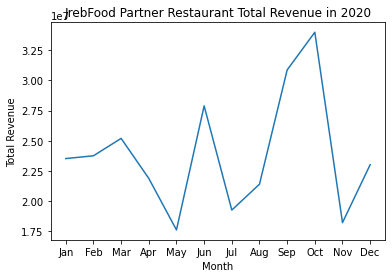

In [ ]:
#b.	Show JrebFood partner restaurant 
#revenue for every month in 2020 using line plot.
data=spark.sql("""
  select month(transactiondate) as monthly, sum(foodprice*quantity) as revenue
  from header h
    join detail d on d.transactionid = h.transactionid
    join food f on f.foodid = d.foodid
    join resto r on r.restaurantid = h.restaurantid
  where year(transactiondate) = 2020 and ispartner = 'TRUE'
  group by monthly
  order by monthly
  
""").toPandas()

#display(data)

plt.plot(data["monthly"], data["revenue"])
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("JrebFood Partner Restaurant Total Revenue in 2020")
plt.show()

,count,benefit
0,527,Unsubsidized Gasoline
1,473,Subsidized Gasoline


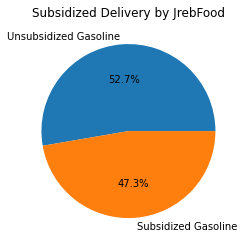

In [ ]:
#c.	Show the percentage of deliveries that JrebFood 
# subsidize using pie plot. The delivery will be subsidized 
# based on the distance of the delivery as follows

data = spark.sql("""
  select count(distance) as count,
    case 
    when distance > (
    select avg(distance) as avgdis
    from header h
    where month(transactiondate) = '1'
  ) then 'Subsidized Gasoline'
  
    when distance <= (
    select avg(distance) as avgdis
    from header h
    where month(transactiondate) = '1'
  ) then 'Unsubsidized Gasoline'

    end as benefit
  from header h
  group by benefit

""").toPandas()

display(data)

plt.pie(data["count"], labels=data["benefit"], autopct="%.1f%%")
plt.title("Subsidized Delivery by JrebFood")
plt.show()